# 1. Importing dataset and data preprocessing

In [3]:
# import modules for data manipulation and visual presentation
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline


import matplotlib.pyplot as plt


### 1.2 Import Dataset

In [4]:
# Read csv file and store dataset into a dataframe called "df"

project = pd.read_excel("C:/Users/Ken/Downloads/Road_Accident.xlsx", index_col=None)

### 1.2 Summarize the Dataset

In [18]:
project.head(5)

,date,time,accident_type,light_condition,road_geometry,severity_type,speed_zone,longitude,latitude,local_gov,region,year,month,hour,minute
0,2011-01-01,01:06:00,Struck pedestrian,Dark street lights on,'T' Intersection,Other injury accident,60,145.108388,-38.038460,KINGSTON,METROPOLITAN SOUTH EAST REGION,2011,1,1,6
1,2011-01-01,00:15:00,Collision with a fixed object,Dark street lights on,Cross intersection,Serious injury accident,50,145.098231,-37.702725,BANYULE,METROPOLITAN NORTH WEST REGION,2011,1,0,15
2,2011-01-01,04:28:00,Struck pedestrian,Dark street lights on,Not at intersection,Serious injury accident,70,145.268932,-38.027816,CASEY,METROPOLITAN SOUTH EAST REGION,2011,1,4,28
3,2011-01-01,01:07:00,Struck pedestrian,Dark no street lights,Not at intersection,Fatal accident,60,144.132820,-36.736139,BENDIGO,NORTHERN REGION,2011,1,1,7
4,2011-01-01,11:54:00,Collision with a fixed object,Day,Not at intersection,Serious injury accident,50,145.231654,-37.878448,KNOX,METROPOLITAN SOUTH EAST REGION,2011,1,11,54


### 1.3 Data preprocessing

NOTE: Dropping columns that are not useful, before we start any operations on the data frame.

In [6]:
# Dropping columns that are not useful in the analysis
project.drop(['ACCIDENT_NO','DCA_CODE_DESCRIPTION','DCA_CODE_TYPE','NO_PERSONS_INVOLVED','NO_PERSONS_KILLED',
              'NO_PERSONS_INJ_SERIOUS','NO_PERSONS_INJ_MEDICAL_ATTENTION','NO_PERSONS_NOT_INJ','NO_OF_VEHICLES',
              'POLICE_ATTEND_DESCRIPTION','SEVERITY','LOCATION_TYPE','LOCALS_INVOLVED','ROAD_NAME_1','ROAD_TYPE_1',
              'ROAD_NAME_2','ROAD_TYPE_2','DIRECTION_LOCATION','DIRECTORY','EDITION','PAGE','GRID_REFERENCE_X',
              'GRID_REFERENCE_Y'], axis=1, inplace=True)

#### NOTE: Renaming certain columns for better readability 

In [7]:
# Renaming certain columns for better readability 
project.rename(columns={'ACCIDENT_DATE': 'date','ACCIDENT_TIME': 'time',
                        'ACCIDENT_DESCRIPTION': 'accident_type',
                        'LIGHT_CONDITION_DESCRIPTION': 'light_condition',
                        'ROAD_GEOMETRY_DESCRIPTION': 'road_geometry',
                        'SEVERITY_DESCRIPTION':'severity_type',
                        'SPEED_ZONE':'speed_zone',
                        'LON': 'longitude',
                        'LAT': 'latitude',
                        'LGA_NAME': 'local_gov',
                        'REGION_NAME': 'region'                   
                        }, inplace=True)

#### NOTE: Rearranging columns for better understanding

In [10]:
# Divide data by years and months
project['date'] = pd.to_datetime(project['date'])
project['year'], project['month'] = project['date'].dt.year, project['date'].dt.month

# Split Time into Hour and Minutes 
project['hour'] = pd.to_datetime(project['time'], format='%H:%M:%S').dt.hour
project['minute'] = pd.to_datetime(project['time'], format='%H:%M:%S').dt.minute


In [14]:
project.head(5)

,date,time,accident_type,light_condition,road_geometry,severity_type,speed_zone,longitude,latitude,local_gov,region,year,month,hour,minute
0,2011-01-01,01:06:00,Struck pedestrian,Dark street lights on,'T' Intersection,Other injury accident,60,145.108388,-38.038460,KINGSTON,METROPOLITAN SOUTH EAST REGION,2011,1,1,6
1,2011-01-01,00:15:00,Collision with a fixed object,Dark street lights on,Cross intersection,Serious injury accident,50,145.098231,-37.702725,BANYULE,METROPOLITAN NORTH WEST REGION,2011,1,0,15
2,2011-01-01,04:28:00,Struck pedestrian,Dark street lights on,Not at intersection,Serious injury accident,70,145.268932,-38.027816,CASEY,METROPOLITAN SOUTH EAST REGION,2011,1,4,28
3,2011-01-01,01:07:00,Struck pedestrian,Dark no street lights,Not at intersection,Fatal accident,60,144.132820,-36.736139,BENDIGO,NORTHERN REGION,2011,1,1,7
4,2011-01-01,11:54:00,Collision with a fixed object,Day,Not at intersection,Serious injury accident,50,145.231654,-37.878448,KNOX,METROPOLITAN SOUTH EAST REGION,2011,1,11,54


In [15]:
project.info() # no need to output this line, it can be deleted. (Useless)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25484 entries, 0 to 25483
Data columns (total 15 columns):
date               25484 non-null datetime64[ns]
time               25484 non-null object
accident_type      25484 non-null object
light_condition    25484 non-null object
road_geometry      25484 non-null object
severity_type      25484 non-null object
speed_zone         25484 non-null int64
longitude          25484 non-null float64
latitude           25484 non-null float64
local_gov          25484 non-null object
region             25484 non-null object
year               25484 non-null int64
month              25484 non-null int64
hour               25484 non-null int64
minute             25484 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(7)
memory usage: 2.9+ MB


# 2. Accident data visualization

### 2.1 lets look at the bar chart and trend

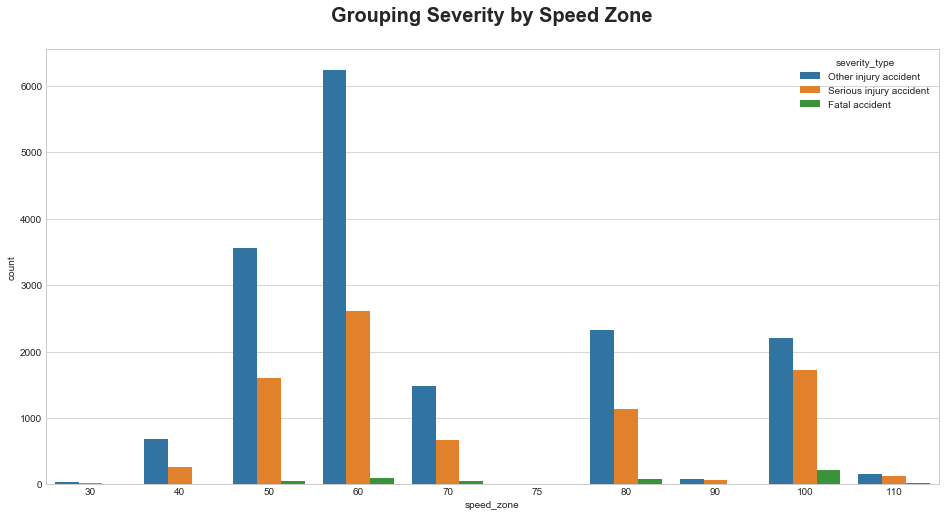

In [74]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
plt.title('Grouping Severity by Speed Zone', fontsize=20, fontweight='bold', y=1.05)
ax = sns.countplot(x="speed_zone", hue='severity_type', data=project)

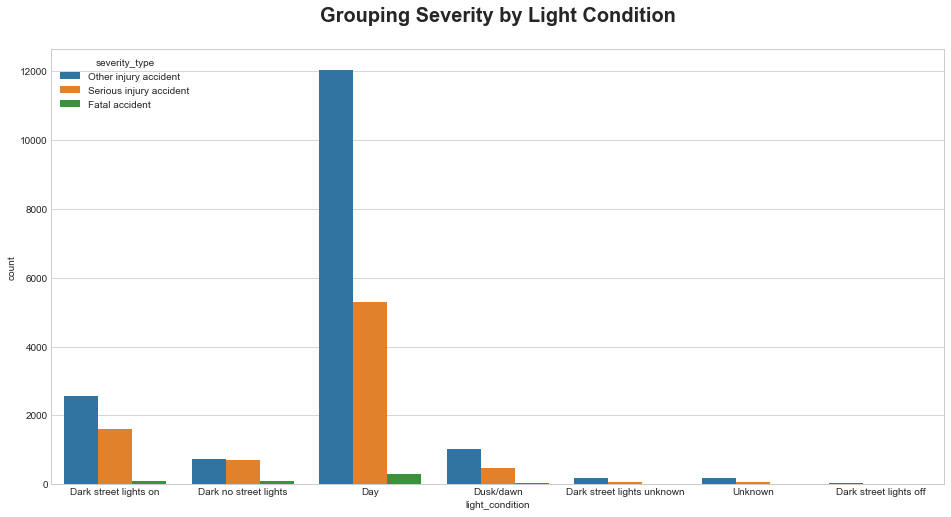

In [75]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
plt.title('Grouping Severity by Light Condition', fontsize=20, fontweight='bold', y=1.05)
ax = sns.countplot(x="light_condition", hue='severity_type', data=project)

#### NOTE: Let's group the data on basis of type of accident, sum up the number of accidents in all type and sort descendingly. then mark the regions on the map 

In [47]:
project.groupby(['accident_type']).size()

accident_type
Collision with a fixed object         4188
Collision with some other object       203
Collision with vehicle               15902
Fall from or in moving vehicle         275
No collision and no object struck     1235
Other accident                           9
Struck animal                          208
Struck pedestrian                     2478
Vehicle overturned (no collision)      986
dtype: int64

### Start from here.

In [48]:
trace1 = go.Bar(
    x = ['accident_type'],
    y = 'accident',
    name='Type of Accident',
    marker=dict(
        color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        colorscale='Jet',
        line=dict(
            color='rgb(0, 0, 0)',
            width=1
        )
    ),
    opacity=0.6
)

data = [trace1]

layout = go.Layout(
    barmode='stack',
    title = 'Accident on Different Collision Type',
    titlefont=dict(size=25),
    width=850,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=100,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of Accident',
        ### Start from here.anchor = 'x',
        rangemode='tozero'
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

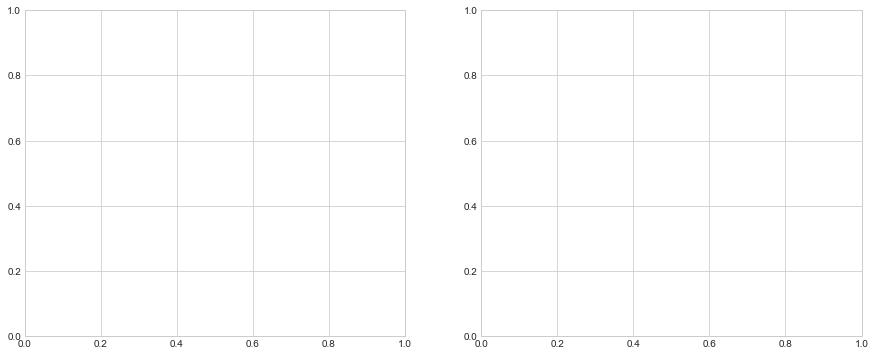

In [31]:
# Set up matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15,6))

#### Number of fatal accident per month 

In [76]:
pl

NameError: name 'pl' is not defined

In [ ]:
trace1 = go.Bar(
    x = players_value["Name"].tolist(),
    y = players_value["Overall"].tolist(),
    name='Overall',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x = players_value["Name"].tolist(),
    y = players_value["PotentialPoints"].tolist(),
    name='Potential',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = players_value["Name"].tolist(),
    y = (players_value["ValueNum"] / 1000000).tolist(),
    name='Value [M€]',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2,trace3]

layout = go.Layout(
    barmode='stack',
    title = 'Number of accident per month',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'No. of Accident',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Month'),
    yaxis2=dict(
        title='Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 20
    ),
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### 2.5 Bird's eye view of Victoria Map

In [32]:
# Creating DataFrame containing cities with the highiest number of workplaces
top_industry = full_data.sort_values(by=["Sum"], ascending=False).head(10)

# Preparing information to mark cities with highiest number of workplaces
top_industry_names = top_industry["LIBGEO"].values.tolist()
top_industry_lons = top_industry["longitude"].values.tolist()
top_industry_lats = top_industry["latitude"].values.tolist()

lons = full_data["longitude"].values.tolist()
lats = full_data["latitude"].values.tolist()
size = (full_data["Sum"]/5).values.tolist()

NameError: name 'full_data' is not defined

In [27]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=size, norm=colors.LogNorm(vmin=1, vmax=max(size)), cmap='hsv')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(top_industry_lons, top_industry_lats)
map.scatter(x1, y1, c="black")

for i in range(len(top_industry_names)):
    plt.annotate(top_industry_names[i], xy=(map(top_industry_lons[i] + 0.25,  top_industry_lats[i])), fontsize=25)

plt.title("French Industry from a bird's eye view", fontsize=40, fontweight='bold', y=1.05)   

plt.show()

NameError: name 'Basemap' is not defined

In [ ]:
# Lets cut smaller cut of the map and focus on  French Riviera
lons_min = 3
lons_max = 8
lats_min = 42.5
lats_max = 45

mask_lons = (full_data["longitude"] > lons_min) & (full_data["longitude"] < lons_max)
mask_lats = (full_data["latitude"] > lats_min) & (full_data["latitude"] < lats_max)
franch_riviera = full_data[mask_lons & mask_lats]

lons = franch_riviera["longitude"].values.tolist()
lats = franch_riviera["latitude"].values.tolist()
size = (franch_riviera["Sum"]/2).values.tolist()

# Creating DataFrame containing cities with the highiest number of workplaces
top_industry = franch_riviera.sort_values(by=["Sum"], ascending=False).head(5)

# Preparing information to mark cities with highiest number of workplaces
top_industry_names = top_industry["LIBGEO"].values.tolist()
top_industry_lons = top_industry["longitude"].values.tolist()
top_industry_lats = top_industry["latitude"].values.tolist()

In [ ]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=(lats_min + lats_max)/2,
            lon_0=(lons_min + lons_max)/2,
            resolution='h',
            llcrnrlon=lons_min, llcrnrlat=lats_min,
            urcrnrlon=lons_max, urcrnrlat=lats_max)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=size, norm=colors.LogNorm(vmin=1, vmax=max(size)), cmap='hsv')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(top_industry_lons, top_industry_lats)
map.scatter(x1, y1, c="black")

for i in range(len(top_industry_names)):
    plt.annotate(top_industry_names[i], xy=(map(top_industry_lons[i] + 0.25,  top_industry_lats[i])), fontsize=25)

plt.title("French Riviera", fontsize=40, fontweight='bold', y=1.05)  

plt.show()

In [ ]:
by_regions = full_data.merge(regions[["region_name", "region_rank"]], how="left", on="region_name" )

In [ ]:
lons = by_regions["longitude"].values.tolist()
lats = by_regions["latitude"].values.tolist()
size = (by_regions["Sum"]/5).values.tolist()
region = by_regions["region_rank"].values.tolist()

In [35]:
regions_capitals = by_regions[by_regions["region_capital"] == by_regions["common_name"]]

lons_capital = regions_capitals["longitude"].values.tolist()
lats_capital = regions_capitals["latitude"].values.tolist()
names_region = regions_capitals["region_name"].values.tolist()

NameError: name 'by_regions' is not defined

In [ ]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=region, cmap='jet')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(lons_capital, lats_capital)
map.scatter(x1, y1, c="black")

for i in range(len(names_region)):
    plt.annotate(names_region[i], xy=(map(lons_capital[i] - 0.07 * len(names_region[i]),  lats_capital[i] + 0.2)), fontsize=18)

plt.title("Regions with the highiest number of workplaces", fontsize=30, fontweight='bold', y=1.05)   

plt.show()